<a href="https://colab.research.google.com/github/deadpirate56/Udacity-Data-Science-Nanodegree/blob/main/Final_DT_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Importing required libraries



In [ ]:
import numpy as np 
import pandas as pd 

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import json

print ("Set up complete!")




Set up complete!


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Loading the data

In [ ]:
sales_2015_path = '/content/drive/My Drive/Data Science Hackathon/bb9f6a4cbd5311ea/Dataset/2015_sales_data.csv'
sales_2016_path ='/content/drive/My Drive/Data Science Hackathon/bb9f6a4cbd5311ea/Dataset/2016_sales_data.csv'
sales_2017_path = '/content/drive/My Drive/Data Science Hackathon/bb9f6a4cbd5311ea/Dataset/2017_sales_data.csv'
sales_2018_path = '/content/drive/My Drive/Data Science Hackathon/bb9f6a4cbd5311ea/Dataset/2018_sales_data.csv'
city_dict_path = open('/content/drive/My Drive/Data Science Hackathon/bb9f6a4cbd5311ea/Dataset/city_dict.json')
expected_discount_path = '/content/drive/My Drive/Data Science Hackathon/bb9f6a4cbd5311ea/Dataset/expected_discount.csv'
foot_fall = '/content/drive/My Drive/Data Science Hackathon/bb9f6a4cbd5311ea/Dataset/foot_fall.csv'
historical_discount = '/content/drive/My Drive/Data Science Hackathon/bb9f6a4cbd5311ea/Dataset/historical_discount.csv'
product_information = '/content/drive/My Drive/Data Science Hackathon/bb9f6a4cbd5311ea/Dataset/product_information.csv'
sample_submission = '/content/drive/My Drive/Data Science Hackathon/bb9f6a4cbd5311ea/Dataset/sample_submission.csv'
test_data = '/content/drive/My Drive/Data Science Hackathon/bb9f6a4cbd5311ea/Dataset/test_data.csv'

sales_2015 = pd.read_csv (sales_2015_path)
sales_2016 = pd.read_csv (sales_2016_path)
sales_2017 = pd.read_csv (sales_2017_path)
sales_2018 = pd.read_csv (sales_2018_path)
city_dict = json.load (city_dict_path)
expected_discount = pd.read_csv (expected_discount_path)
foot_fall = pd.read_csv (foot_fall)
historical_discount = pd.read_csv (historical_discount)
product_information = pd.read_csv (product_information)
sample_submission = pd.read_csv (sample_submission)
test_data = pd.read_csv (test_data)
test_data['date'] = pd.to_datetime(test_data['date'])

print("Data Load complete!")

Data Load complete!


# Vizualising and Exploring the data

### Exploring Sales Data Files
We have data from 4 years - 2015,16,17 and 18
we will check for nulls in the data and then we will merge all tables to create a single dataframe "Sales"




In [ ]:

print("sales_2017")
print(sales_2017.head())
print("sales_2018")
print(sales_2018.head())

sales_2017
         date  city  product  sales
0  2017-01-02     1        1   28.0
1  2017-01-02     1        2   72.0
2  2017-01-02     1        3  128.0
3  2017-01-02     1        4   20.0
4  2017-01-02     1        5    4.0
sales_2018
         date  city  product  sales
0  2018-01-02     1     1292   48.0
1  2018-01-02     1        1   64.0
2  2018-01-02     1        2   48.0
3  2018-01-02     1        3  104.0
4  2018-01-02     1        4   16.0


In [ ]:

print("2017 sales data null check")
print(sales_2017.isnull().sum())
print("2018 sales data null check")
print(sales_2018.isnull().sum())

2017 sales data null check
date       0
city       0
product    0
sales      0
dtype: int64
2018 sales data null check
date       0
city       0
product    0
sales      0
dtype: int64


### Appending all year wise sales dataframes together to create a final sales dataframe

In [ ]:

yearly_sales = sales_2017.append(sales_2018, ignore_index = True)
yearly_sales['date'] = pd.to_datetime(yearly_sales['date'])

yearly_sales.head()

,date,city,product,sales
0,2017-01-02,1,1,28.0
1,2017-01-02,1,2,72.0
2,2017-01-02,1,3,128.0
3,2017-01-02,1,4,20.0
4,2017-01-02,1,5,4.0


In [ ]:
test_data.astype({'date':'datetime64'})

,id,date,city,product
0,1,2018-05-01,1,1292
1,2,2018-05-01,1,1
2,3,2018-05-01,1,2
3,4,2018-05-01,1,3
4,5,2018-05-01,1,4
...,...,...,...,...
2262130,2262131,2018-07-31,10,3163
2262131,2262132,2018-07-31,10,3164
2262132,2262133,2018-07-31,10,3157
2262133,2262134,2018-07-31,10,3165


Using the len function allows us to view how many rows are there in this entire dataframe -

In [ ]:
print ("total rows of sales data : ", len(yearly_sales))

total rows of sales data :  10253427


### Exploring the City Dataset

City dataset has the codes for each of the cities

In [ ]:
city = pd.DataFrame.from_dict(city_dict, orient='index', columns =['City'])
city['city_code']= city.index

city_name_code_dictionary = city.set_index("City").to_dict()
city

,City,city_code
4,Mumbai,4
5,Delhi,5
7,Bangalore,7
1,Kolkata,1
6,Chennai,6
8,Hyderabad,8
9,Ahmedabad,9
3,Jaipur,3
10,Lucknow,10
2,Other,2


In [ ]:
city_name_code_dictionary = city.set_index("City").to_dict()
city_name_code_dictionary

{'city_code': {'Ahmedabad': '9',
  'Bangalore': '7',
  'Chennai': '6',
  'Delhi': '5',
  'Hyderabad': '8',
  'Jaipur': '3',
  'Kolkata': '1',
  'Lucknow': '10',
  'Mumbai': '4',
  'Other': '2'}}

###Discount files

we have two discount files in our dataset -


*   Expected_discount
*   Historical_dicount

Historical discount should give us the data for the discount at product, date, city level
expected discount has the discount rates for the coming 2 months - that is - for May and June 2018



In [ ]:
print("expected_discount")
print(expected_discount.head())
print("historical_discount")
print(historical_discount.head())


expected_discount
         date  product  ...  Discount_Mumbai  Discount_Other
0  2018-05-01        2  ...              1.0             0.0
1  2018-05-01       30  ...              1.0             1.0
2  2018-05-01       31  ...              1.0             1.0
3  2018-05-01       32  ...              1.0             1.0
4  2018-05-01       33  ...              1.0             1.0

[5 rows x 12 columns]
historical_discount
         date  product  ...  Discount_Mumbai  Discount_Other
0  2016-04-29       45  ...              0.0             1.0
1  2016-04-29      255  ...              0.0             1.0
2  2016-04-29      316  ...              0.0             1.0
3  2016-04-29      594  ...              0.0             1.0
4  2016-04-29      664  ...              0.0             1.0

[5 rows x 12 columns]


In [ ]:
# let's rename the columns to have the city codes instead of names of cities
expected_discount.rename(columns = {'Discount_Ahmedabad': 9,
  'Discount_Bangalore': 7,
  'Discount_Chennai': 6,
  'Discount_Delhi': 5,
  'Discount_Hyderabad': 8,
  'Discount_Jaipur': 3,
  'Discount_Kolkata': 1,
  'Discount_Lucknow': 10,
  'Discount_Mumbai': 4,
  'Discount_Other': 2}, inplace = True )

historical_discount.rename(columns = {'Discount_Ahmedabad': 9,
  'Discount_Bangalore': 7,
  'Discount_Chennai': 6,
  'Discount_Delhi': 5,
  'Discount_Hyderabad': 8,
  'Discount_Jaipur': 3,
  'Discount_Kolkata': 1,
  'Discount_Lucknow': 10,
  'Discount_Mumbai': 4,
  'Discount_Other': 2}, inplace = True )


print(expected_discount.columns)
print(historical_discount.columns)

Index(['date', 'product', 9, 7, 6, 5, 8, 3, 1, 10, 4, 2], dtype='object')
Index(['date', 'product', 9, 7, 6, 5, 8, 3, 1, 10, 4, 2], dtype='object')


In [ ]:
expected_discount.head()
historical_discount.head()

,date,product,9,7,6,5,8,3,1,10,4,2
0,2016-04-29,45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2016-04-29,255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2016-04-29,316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2016-04-29,594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2016-04-29,664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


###Let's pivot down the discount tables to get it on the same grain as the sales and test data

In [ ]:
# pivot down the discount tables
expec_disc_pivotdown= expected_discount.melt(id_vars=['date','product'], var_name='City_Code', value_name='Discount')
hist_disc_pivotdown = historical_discount.melt(id_vars=['date','product'], var_name='City_Code', value_name='Discount')

expec_disc_pivotdown['date'] = pd.to_datetime(expec_disc_pivotdown['date'])
hist_disc_pivotdown['date'] = pd.to_datetime(hist_disc_pivotdown['date'])

In [ ]:
print(expec_disc_pivotdown.head())
print(hist_disc_pivotdown.head())

        date  product City_Code  Discount
0 2018-05-01        2         9       0.0
1 2018-05-01       30         9       1.0
2 2018-05-01       31         9       1.0
3 2018-05-01       32         9       1.0
4 2018-05-01       33         9       1.0
        date  product City_Code  Discount
0 2016-04-29       45         9       0.0
1 2016-04-29      255         9       0.0
2 2016-04-29      316         9       0.0
3 2016-04-29      594         9       0.0
4 2016-04-29      664         9       0.0


Null Check on discount tables

In [ ]:
print("expected_discount_null")
print(expected_discount.isnull().sum())
print("historical_discount_null")
print(historical_discount.isnull().sum())


expected_discount_null
date       0
product    0
9          0
7          0
6          0
5          0
8          0
3          0
1          0
10         0
4          0
2          0
dtype: int64
historical_discount_null
date       0
product    0
9          0
7          0
6          0
5          0
8          0
3          0
1          0
10         0
4          0
2          0
dtype: int64


##Exploring the foot fall data set

> Footfall dataset shows the number of customers shopping on a particular date in a particular city



In [ ]:
print(foot_fall.head())
print ("nulls in footfall dataset!")
foot_fall_nulls = foot_fall.isnull().sum()
print(foot_fall_nulls.sum())

        city  1/2/2015  1/3/2015  ...  4/28/2018  4/29/2018  4/30/2018
0  Ahmedabad      9384      6808  ...       9256      12360      14308
1  Bangalore     16644     14640  ...      11680      14748      19344
2    Chennai     19544     13752  ...      10428      12232      18408
3      Delhi     16832     13256  ...      10904      14052      17984
4  Hyderabad     13588     11548  ...       8508       9912      16380

[5 rows x 1207 columns]
nulls in footfall dataset!
3


###There are 3 nulls in the footfall dataset. We need to check for these null_values and fill them with mean of that city's mean footfall




> We start by transposing the data so as to get columns as the City names



In [ ]:
foot_fall_transposed = foot_fall.transpose()
foot_fall_transposed.columns = foot_fall_transposed.iloc[0]
foot_fall_transposed = foot_fall_transposed[1:]
foot_fall_transposed.head()

city,Ahmedabad,Bangalore,Chennai,Delhi,Hyderabad,Jaipur,Kolkata,Lucknow,Mumbai,Other
1/2/2015,9384,16644,19544,16832,13588,13000,13948,12308,19284,8572
1/3/2015,6808,14640,13752,13256,11548,11616,12104,9228,14472,7180
1/4/2015,8064,15660,13736,14520,11600,11848,12752,10792,16676,6716
1/5/2015,10248,19056,19740,17324,16336,12240,14492,13836,19684,8616
1/6/2015,11180,19740,21604,17672,18364,10992,14360,13188,19700,9252




> Now we check for the City which has the null values



In [ ]:
# looping through the columns in footfall dataset to get the cities with missing footfall data
city_with_na=[city for city in foot_fall_transposed.columns if foot_fall_transposed[city].isnull().sum()>0]
print(" City with nulls in the footfall dataset :", city_with_na )

 City with nulls in the footfall dataset : ['Jaipur', 'Kolkata', 'Other']


Let's define a function and pass the footfall dataframe with the cities with missing footfall and fill the missing information with the median footfall of that city!

In [ ]:
# defining a function to replace missing values by the median footfall for that city
def replace_missing_footfall(dataset,features_nan):
    data=dataset.copy()
    data[features_nan]=data[features_nan].fillna(data[features_nan].median())
    return data


footfall_data = replace_missing_footfall(foot_fall_transposed,city_with_na)
print(footfall_data.head())
print(footfall_data.isnull().sum())

city     Ahmedabad Bangalore Chennai  Delhi  ...  Kolkata  Lucknow  Mumbai   Other
1/2/2015      9384     16644   19544  16832  ...  13948.0    12308   19284  8572.0
1/3/2015      6808     14640   13752  13256  ...  12104.0     9228   14472  7180.0
1/4/2015      8064     15660   13736  14520  ...  12752.0    10792   16676  6716.0
1/5/2015     10248     19056   19740  17324  ...  14492.0    13836   19684  8616.0
1/6/2015     11180     19740   21604  17672  ...  14360.0    13188   19700  9252.0

[5 rows x 10 columns]
city
Ahmedabad    0
Bangalore    0
Chennai      0
Delhi        0
Hyderabad    0
Jaipur       0
Kolkata      0
Lucknow      0
Mumbai       0
Other        0
dtype: int64


In [ ]:
# renaming columns using the rename function
footfall_data.rename(columns = {'Ahmedabad': 9,
  'Bangalore': 7,
  'Chennai': 6,
  'Delhi': 5,
  'Hyderabad': 8,
  'Jaipur': 3,
  'Kolkata': 1,
  'Lucknow': 10,
  'Mumbai': 4,
  'Other': 2}, inplace = True )


footfall_data['date'] = footfall_data.index
footfall_data.head()

city,9,7,6,5,8,3,1,10,4,2,date
1/2/2015,9384,16644,19544,16832,13588,13000.0,13948.0,12308,19284,8572.0,1/2/2015
1/3/2015,6808,14640,13752,13256,11548,11616.0,12104.0,9228,14472,7180.0,1/3/2015
1/4/2015,8064,15660,13736,14520,11600,11848.0,12752.0,10792,16676,6716.0,1/4/2015
1/5/2015,10248,19056,19740,17324,16336,12240.0,14492.0,13836,19684,8616.0,1/5/2015
1/6/2015,11180,19740,21604,17672,18364,10992.0,14360.0,13188,19700,9252.0,1/6/2015


###Let's pivot down the footfall data as well to get it at the grain of Test and Sales data

In [ ]:
footfall_pivotdown= footfall_data.melt(id_vars=['date'], var_name='City_Code', value_name='foot_fall')
# coverting the date to datetime format
footfall_pivotdown['date'] = pd.to_datetime(footfall_pivotdown['date'])
footfall_pivotdown.head()

,date,City_Code,foot_fall
0,2015-01-02,9,9384
1,2015-01-03,9,6808
2,2015-01-04,9,8064
3,2015-01-05,9,10248
4,2015-01-06,9,11180


## Exploring the Product Information file


> 



In [ ]:
product_information.head()

,product,product_category,product_subcategory,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10
0,1,Cat_753,SubCat_3077,0.715514,0.299219,0.381067,0.0003,0.363847,0.300629,0.08,0.416806,1.171543,0.668805
1,2,Cat_643,SubCat_3774,0.075851,0.298774,0.852691,0.0003,0.409503,0.465912,0.08,0.545467,0.541547,0.401800
2,3,Cat_2804,SubCat_7454,0.285910,0.308168,0.531137,0.0003,0.168459,0.517364,0.08,0.521452,0.945024,0.631538
3,4,Cat_71,SubCat_5,0.544437,0.281760,0.530937,0.0003,0.291839,0.302639,0.08,0.519929,0.635492,0.991901
4,5,Cat_1556,SubCat_9403,0.852752,0.301493,0.343009,0.0003,0.286037,0.822326,0.08,0.462138,0.574709,0.792799


In [ ]:
product_information.isnull().sum()

product                0
product_category       0
product_subcategory    0
var_1                  0
var_2                  0
var_3                  0
var_4                  0
var_5                  0
var_6                  0
var_7                  0
var_8                  0
var_9                  0
var_10                 0
dtype: int64

#Final tables for joining to get a final master table


> Sales - yearly_sales


> Discount - hist_disc_pivotdown; hist_disc_pivotdown


> Footfall - footfall_pivotdown



> product_information








In [ ]:
print(yearly_sales.head())
yearly_sales.dtypes

        date  city  product  sales
0 2017-01-02     1        1   28.0
1 2017-01-02     1        2   72.0
2 2017-01-02     1        3  128.0
3 2017-01-02     1        4   20.0
4 2017-01-02     1        5    4.0


date       datetime64[ns]
city                int64
product             int64
sales             float64
dtype: object

In [ ]:
print(hist_disc_pivotdown.head())

hist_disc_pivotdown = hist_disc_pivotdown.astype({'City_Code':'int64'})
expec_disc_pivotdown = expec_disc_pivotdown.astype({'City_Code':'int64'})
hist_disc_pivotdown.dtypes

        date  product City_Code  Discount
0 2016-04-29       45         9       0.0
1 2016-04-29      255         9       0.0
2 2016-04-29      316         9       0.0
3 2016-04-29      594         9       0.0
4 2016-04-29      664         9       0.0


date         datetime64[ns]
product               int64
City_Code             int64
Discount            float64
dtype: object

In [ ]:
#merging sales and discount tables
df_sales_discount = yearly_sales.merge(hist_disc_pivotdown,how ='left',left_on = ['date','city','product'],
                                       right_on = ['date','City_Code','product'],suffixes = ('_sales','_disc'))

df_sales_discount.head()


,date,city,product,sales,City_Code,Discount
0,2017-01-02,1,1,28.0,1.0,1.0
1,2017-01-02,1,2,72.0,NaN,NaN
2,2017-01-02,1,3,128.0,NaN,NaN
3,2017-01-02,1,4,20.0,NaN,NaN
4,2017-01-02,1,5,4.0,1.0,0.0


In [ ]:
print(footfall_pivotdown.head())
footfall_pivotdown = footfall_pivotdown.astype({'City_Code':'int64','foot_fall':'int64'})
footfall_pivotdown.dtypes

        date City_Code foot_fall
0 2015-01-02         9      9384
1 2015-01-03         9      6808
2 2015-01-04         9      8064
3 2015-01-05         9     10248
4 2015-01-06         9     11180


date         datetime64[ns]
City_Code             int64
foot_fall             int64
dtype: object

In [ ]:
product_information.head()

,product,product_category,product_subcategory,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10
0,1,Cat_753,SubCat_3077,0.715514,0.299219,0.381067,0.0003,0.363847,0.300629,0.08,0.416806,1.171543,0.668805
1,2,Cat_643,SubCat_3774,0.075851,0.298774,0.852691,0.0003,0.409503,0.465912,0.08,0.545467,0.541547,0.401800
2,3,Cat_2804,SubCat_7454,0.285910,0.308168,0.531137,0.0003,0.168459,0.517364,0.08,0.521452,0.945024,0.631538
3,4,Cat_71,SubCat_5,0.544437,0.281760,0.530937,0.0003,0.291839,0.302639,0.08,0.519929,0.635492,0.991901
4,5,Cat_1556,SubCat_9403,0.852752,0.301493,0.343009,0.0003,0.286037,0.822326,0.08,0.462138,0.574709,0.792799


In [ ]:
df_sales_disc_footfall = df_sales_discount.merge(footfall_pivotdown,how ='left',left_on = ['date','city'],
                                       right_on = ['date','City_Code'],suffixes = ('_sales','_ffall'))
df_sales_disc_footfall.head()

,date,city,product,sales,City_Code_sales,Discount,City_Code_ffall,foot_fall
0,2017-01-02,1,1,28.0,1.0,1.0,1.0,13716.0
1,2017-01-02,1,2,72.0,NaN,NaN,1.0,13716.0
2,2017-01-02,1,3,128.0,NaN,NaN,1.0,13716.0
3,2017-01-02,1,4,20.0,NaN,NaN,1.0,13716.0
4,2017-01-02,1,5,4.0,1.0,0.0,1.0,13716.0


In [ ]:
sales_master = df_sales_disc_footfall.merge(product_information,how ='left',
                                            left_on = 'product', right_on ='product', suffixes = ('_sales','_pinfo'))

# EDA (Exploratory data analysis) & Feature engineering

This is quite a large dataset with a lot of information. Let's try to dissect the data and get some meaningful information from it 

### Sales trend by city
let's look at the trend of sales by city 


In [ ]:
#replacing discount column Nan by 0 stating that those products did not have any discount on the given day
sales_master['Discount'] = sales_master['Discount'].fillna(0)
sales_master.drop(['City_Code_sales','City_Code_ffall'],axis = 1, inplace = True)


In [ ]:
sales_master.head()

,date,city,product,sales,Discount,foot_fall,product_category,product_subcategory,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10
0,2017-01-02,1,1,28.0,1.0,13716.0,Cat_753,SubCat_3077,0.715514,0.299219,0.381067,0.0003,0.363847,0.300629,0.08,0.416806,1.171543,0.668805
1,2017-01-02,1,2,72.0,0.0,13716.0,Cat_643,SubCat_3774,0.075851,0.298774,0.852691,0.0003,0.409503,0.465912,0.08,0.545467,0.541547,0.401800
2,2017-01-02,1,3,128.0,0.0,13716.0,Cat_2804,SubCat_7454,0.285910,0.308168,0.531137,0.0003,0.168459,0.517364,0.08,0.521452,0.945024,0.631538
3,2017-01-02,1,4,20.0,0.0,13716.0,Cat_71,SubCat_5,0.544437,0.281760,0.530937,0.0003,0.291839,0.302639,0.08,0.519929,0.635492,0.991901
4,2017-01-02,1,5,4.0,0.0,13716.0,Cat_1556,SubCat_9403,0.852752,0.301493,0.343009,0.0003,0.286037,0.822326,0.08,0.462138,0.574709,0.792799


In [ ]:
sales_master.isnull().sum()

date                       0
city                       0
product                    0
sales                      0
Discount                   0
foot_fall              49348
product_category           0
product_subcategory        0
var_1                      0
var_2                      0
var_3                      0
var_4                      0
var_5                      0
var_6                      0
var_7                      0
var_8                      0
var_9                      0
var_10                     0
dtype: int64

### The below code snippet shows that we are missing foot_fall data for the 3rd and 4th of January

In [ ]:
print(sales_master[sales_master['foot_fall'].isnull()].date.min())
print(sales_master[sales_master['foot_fall'].isnull()].date.max())
#printing to see if the null rows on missing footfall dataframe match the total dataframe for the dates 2018-01-03 and 2018-01-04
# this would help us confirm if we arew misssing the data completely for the two days
print(sales_master[sales_master['foot_fall'].isnull()].city.value_counts())
print(sales_master[(sales_master['date'] == '2018-01-03') | (sales_master['date'] == '2018-01-04') ].city.value_counts())

# our hypothesis is confirmed - we are indeed missing all data for the two days-

2018-01-03 00:00:00
2018-01-04 00:00:00
5     5129
4     5106
1     5022
7     4993
9     4982
6     4937
3     4895
10    4848
8     4798
2     4638
Name: city, dtype: int64
5     5129
4     5106
1     5022
7     4993
9     4982
6     4937
3     4895
10    4848
8     4798
2     4638
Name: city, dtype: int64


### ways to handle the missing values -


> either we can take a rolling average of the previous week or take the exact same days of the previous week and use that data



> In this particular case we would be better off taking the mean of the two days of the last week as the footfall depends on the week day and taking the mean would not affect our model as it is just 46,000 rowws compared to the entire dataset of 10 million










In [ ]:
a =footfall_pivotdown[(footfall_pivotdown['date']=='2017-12-27')|(footfall_pivotdown['date']=='2017-12-28')].foot_fall.mean()
a

14706.8

In [ ]:
sales_master['foot_fall'] = sales_master['foot_fall'].fillna(a)
sales_master.isnull().sum()

date                   0
city                   0
product                0
sales                  0
Discount               0
foot_fall              0
product_category       0
product_subcategory    0
var_1                  0
var_2                  0
var_3                  0
var_4                  0
var_5                  0
var_6                  0
var_7                  0
var_8                  0
var_9                  0
var_10                 0
dtype: int64

## Lets plot the trend of sales by time in different cities

In [ ]:

sales_trend =sales_master.groupby(['date']).sales.sum()
footfall_trend = sales_master.groupby(['date']).foot_fall.mean()

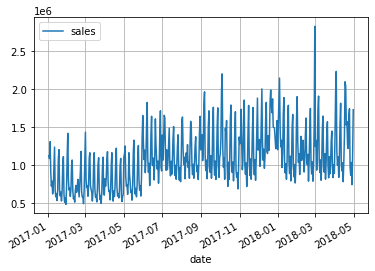

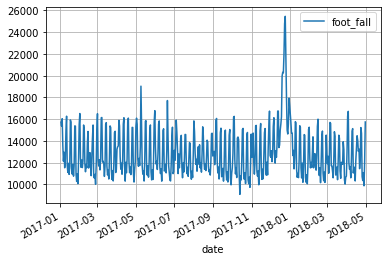

In [ ]:
sales_trend_df = pd.DataFrame(sales_trend)
footfall_trend_df = pd.DataFrame(footfall_trend)


sales_trend_df.plot(grid = True)
footfall_trend_df.plot(grid = True)



---


###Analyzing the complete foot fall trend to see if we generally see a spike in December
### on Similar lines checking the 2015/16 sales trends
---



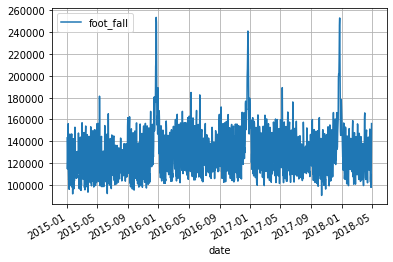

In [ ]:
footfall_complete_trend =pd.DataFrame(footfall_pivotdown.groupby(['date']).foot_fall.sum())
footfall_complete_trend.plot(grid = True)

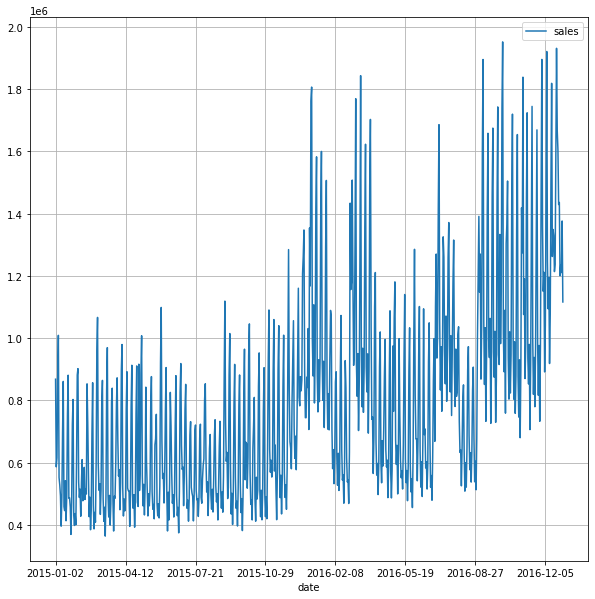

In [ ]:
sales_15_16 = sales_2015.append(sales_2016,ignore_index = True)
sales_complete_trend = pd.DataFrame(sales_15_16.groupby(['date']).sales.sum())

sales_complete_trend.plot(grid = True, figsize = (10,10))



---
###From the above sales and footfall trend it seems that the footfall data is stable with spikes in December although the sales data on an overall level seems to increase


---




## Now let's check the Sales by City and Date

In [ ]:
sales_by_city = pd.DataFrame(yearly_sales.groupby(['date','city']).sales.sum())


In [ ]:
sales_by_city.reset_index(inplace = True)
sales_by_city.head()

,date,city,sales
0,2017-01-02,1,106356.520
1,2017-01-02,2,64254.312
2,2017-01-02,3,58452.140
3,2017-01-02,4,133132.456
4,2017-01-02,5,159410.168


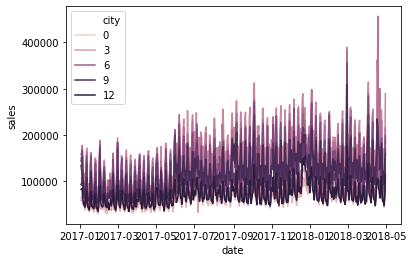

In [ ]:
import seaborn as sns
sns.lineplot(x="date", y="sales",
             hue="city",
             data=sales_by_city)

# this is not clear so let's plot it by city

###Plot sales by cities



> the below plots show that the sales are increasing by time for all city codes thus it is confirmed that thee sales data has time series properties



In [ ]:
def city_sales_plot(df,city):
  df_1 = [abs]
  df_1 = df[df['city'] == city]

  return sns.lineplot(x="date", y="sales",data=df_1)
             
   

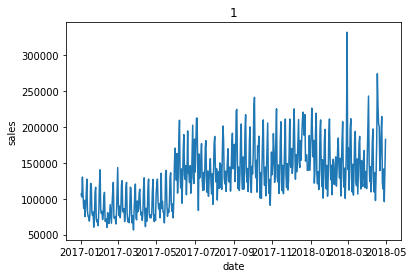

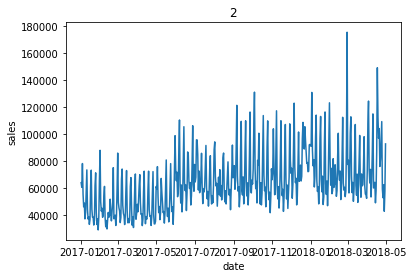

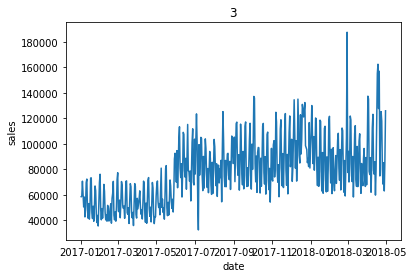

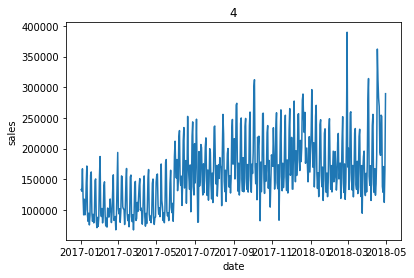

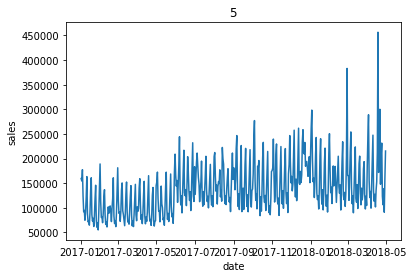

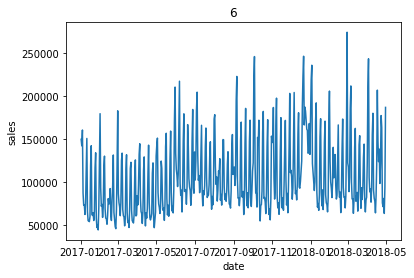

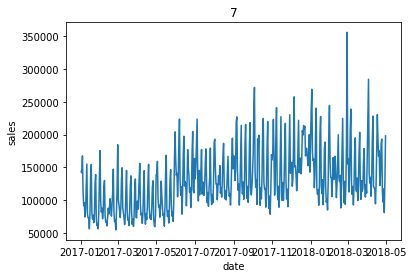

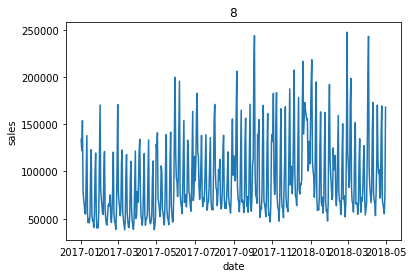

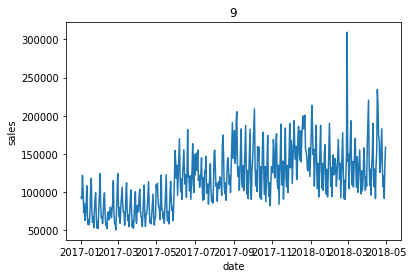

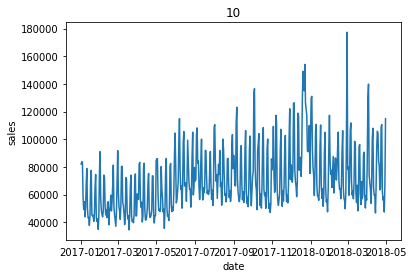

In [ ]:
for i in range(1,11):
  plt.figure(i)
  plt.title(i)
  city_sales_plot(sales_by_city,i)
  

## Exploring the Product Category and Subcategory column -

we will categorically encode them and plot graphs to check wether the sales vary by product category or not?

In [ ]:
# Encoding the product Category and Subcategory columns in the main table
product_map = product_information[['product','product_category','product_subcategory']]

product_map['product_category'] = product_map['product_category'].str.split("_").str.get(1)
product_map['product_subcategory'] = product_map['product_subcategory'].str.split("_").str.get(1)
product_map.rename(columns = {'product_category': 'product_cat','product_subcategory': 'product_subcat'},inplace = True)
product_map.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

,product,product_cat,product_subcat
0,1,753,3077
1,2,643,3774
2,3,2804,7454
3,4,71,5
4,5,1556,9403


In [ ]:
#pulling the encoded column in the sales_master file
sales_master = sales_master.merge(product_map,how = 'left', left_on = 'product',right_on = 'product',suffixes = ('_x','_y'))
sales_master.head()

,date,city,product,sales,Discount,foot_fall,product_category,product_subcategory,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,product_cat,product_subcat
0,2017-01-02,1,1,28.0,1.0,13716.0,Cat_753,SubCat_3077,0.715514,0.299219,0.381067,0.0003,0.363847,0.300629,0.08,0.416806,1.171543,0.668805,753,3077
1,2017-01-02,1,2,72.0,0.0,13716.0,Cat_643,SubCat_3774,0.075851,0.298774,0.852691,0.0003,0.409503,0.465912,0.08,0.545467,0.541547,0.401800,643,3774
2,2017-01-02,1,3,128.0,0.0,13716.0,Cat_2804,SubCat_7454,0.285910,0.308168,0.531137,0.0003,0.168459,0.517364,0.08,0.521452,0.945024,0.631538,2804,7454
3,2017-01-02,1,4,20.0,0.0,13716.0,Cat_71,SubCat_5,0.544437,0.281760,0.530937,0.0003,0.291839,0.302639,0.08,0.519929,0.635492,0.991901,71,5
4,2017-01-02,1,5,4.0,0.0,13716.0,Cat_1556,SubCat_9403,0.852752,0.301493,0.343009,0.0003,0.286037,0.822326,0.08,0.462138,0.574709,0.792799,1556,9403




---
# Category and Subcategory plot insights

we see that the product sales volume depends a lot on the category and subcategory



> product category graph shows high variance by category- thus we need to include this feature in the modelling




> Product Subcategory graph shows a peculiar peak for a subcategory around "1700". This plot also shows extreme high variance



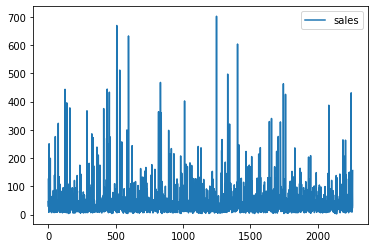

In [ ]:
# plotting the sales by product categories

sales_master.groupby(['product_cat'],as_index = False).sales.mean().plot()

# we see that the sales is varying a lot by the product categories and thus this column can help the model to predict
# the sales for a particular product


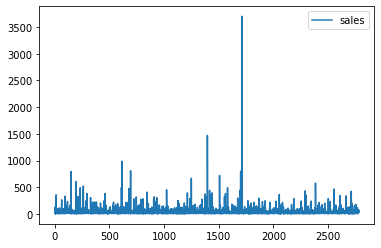

In [ ]:
# plotting the sales by product subcategories
sales_master.groupby(['product_subcat'],as_index = False).sales.mean().plot()

#Creating Rolling Mean and Lag features


---

we can now create rolling averages for set periods in history and also create lag features with multiple offsets

this will help the modfel to take the time variate in the picture


---




In [ ]:
sales_master.sort_values(['product','city','date'],inplace = True)

In [ ]:
# Creating sales rolling mean features
def create_sales_rmean_feats(df, gpby_cols, target_col, windows, min_periods, 
                             shift=93, win_type=None):
    gpby = df.groupby(gpby_cols)
    for w in windows:
        df['_'.join([target_col, 'rmean', str(w)])] = \
            gpby[target_col].shift(shift).rolling(window=w, 
                                                  min_periods=min_periods,
                                                  win_type=win_type).mean().values +\
            np.random.normal(scale=1.6, size=(len(df),))
    return df


# Creating sales lag features
def create_sales_lag_feats(df, gpby_cols, target_col, lags):
    gpby = df.groupby(gpby_cols)
    for i in lags:
        df['_'.join([target_col, 'lag', str(i)])] = \
                gpby[target_col].shift(i).values + np.random.normal(scale=1.6, size=(len(df),))
    return df

In [ ]:
#Imputing the Sales Master table

# adding the lag features
sales_master = create_sales_lag_feats(sales_master, gpby_cols=['city','product'], target_col='sales', 
                               lags=[93,120])

# adding the rolling average features
sales_master = create_sales_rmean_feats(sales_master, gpby_cols=['city','product'], 
                                 target_col='sales', windows=[7,14,60], 
                                 min_periods=2)

# creating Categorical variables using the Date  column
sales_master['dayofmonth'] = sales_master.date.dt.day
sales_master['dayofweek'] = sales_master.date.dt.dayofweek
sales_master['dayofyear'] = sales_master.date.dt.dayofyear

sales_master.dropna(inplace = True)


#With limited ram access it is going to be extremely difficult to use different bagging and boosting techniques



> to avoid such issues we are going to limit the test dataset to data after 2018 and train our model







In [ ]:
sales_master= sales_master[sales_master['date']>'2017-05-01']
sales_master = sales_master.astype({'product_cat':'int32','product_subcat':'int32'})
sales_master['month'] = sales_master.date.dt.month

print(sales_master.shape)
sales_master.head()

(6707316, 29)


,date,city,product,sales,Discount,foot_fall,product_category,product_subcategory,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,product_cat,product_subcat,sales_lag_93,sales_lag_120,sales_rmean_7,sales_rmean_14,sales_rmean_60,dayofmonth,dayofweek,dayofyear,month
2034882,2017-05-06,1,1,8.0,0.0,12788.0,Cat_753,SubCat_3077,0.715514,0.299219,0.381067,0.0003,0.363847,0.300629,0.08,0.416806,1.171543,0.668805,753,3077,4.400578,27.301992,15.290744,18.701899,17.832380,6,5,126,5
2052177,2017-05-07,1,1,8.0,0.0,12060.0,Cat_753,SubCat_3077,0.715514,0.299219,0.381067,0.0003,0.363847,0.300629,0.08,0.416806,1.171543,0.668805,753,3077,50.476615,32.265629,20.340017,20.587596,19.074910,7,6,127,5
2068943,2017-05-08,1,1,40.0,0.0,13444.0,Cat_753,SubCat_3077,0.715514,0.299219,0.381067,0.0003,0.363847,0.300629,0.08,0.416806,1.171543,0.668805,753,3077,2.473997,10.752298,17.508208,20.080741,21.273241,8,0,128,5
2086299,2017-05-09,1,1,40.0,0.0,18464.0,Cat_753,SubCat_3077,0.715514,0.299219,0.381067,0.0003,0.363847,0.300629,0.08,0.416806,1.171543,0.668805,753,3077,15.498676,31.460140,14.561445,19.618728,21.913192,9,1,129,5
2104610,2017-05-10,1,1,16.0,0.0,13720.0,Cat_753,SubCat_3077,0.715514,0.299219,0.381067,0.0003,0.363847,0.300629,0.08,0.416806,1.171543,0.668805,753,3077,15.216466,1.870475,14.927854,20.069850,16.655313,10,2,130,5


# let's look at the correlation for the different columns with sales

In [ ]:
# gettting the correlation
#all_corr = sales_master.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()

### Insights
 

*   We can see that the sales for a given day is highly correlated to the rolling average columns, sales lag columns which was expected
*   Other columns showing high correlation with sales are the foot_fall, Discount, Product, var_6, City. out of these City and product and City are categorical columns which will help while using a model like XG boost, Random forrest etc

any other features we can chuck from our model





In [ ]:
#all_corr[all_corr['level_0'] == 'sales']



---


#Import Models, predict data and Validate using Cross Val Score


---



In [ ]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

print("Model Import Complete!")

Model Import Complete!


In [ ]:
# initializing the models

rf = RandomForestRegressor(n_estimators = 5 , random_state=1)
xgb = XGBRegressor(n_estimators = 5 , learning_rate = 0.1, n_jobs=-1)
dec_tree = DecisionTreeRegressor(max_leaf_nodes = 40, random_state=42)
knn = KNeighborsRegressor(n_neighbors = 10)

features = ['sales_rmean_60','sales_rmean_14','sales_rmean_7','sales_lag_120','sales_lag_93','foot_fall','Discount',
            'dayofweek','city','product_subcat','product_cat','month','product']


X_train = sales_master[features]
y_train = sales_master['sales']

def get_score(model,cv):
  score = -1*cross_val_score(model, X_train, y_train, n_jobs = -1, cv = cv, scoring = 'neg_root_mean_squared_error' )
  return score.mean()



In [ ]:

#get_score(dec_tree,5)
#KNN gives a very good result in this case with 98.558 root mean square error
#this will only get better once we have scaled the data
#DT with leaf not 40 gives 108.685
#DT with 2017-2018, max leaf node 40 data gives 76.41
#DT with 2017-2018, max leaf node 60 data gives 77.37
#DT with 2017-2018, max leaf node 30 data gives 76.89.37

#Preparing the Test Data

In [ ]:
Total_data = sales_2018.append(test_data.drop(['id'],axis = 1),ignore_index = True)
Total_data['date'] = pd.to_datetime(Total_data['date'])

Total_data = Total_data.merge(expec_disc_pivotdown,how ='left',left_on = ['date','city','product'],
                                       right_on = ['date','City_Code','product'],suffixes = ('_sales','_disc'))


Total_data = create_sales_lag_feats(Total_data, gpby_cols=['city','product'], target_col='sales', 
                               lags=[93,120])

Total_data = create_sales_rmean_feats(Total_data, gpby_cols=['city','product'], 
                                 target_col='sales', windows=[7,14,60], min_periods=2)
                                 
Total_data['dayofmonth'] = Total_data.date.dt.day
Total_data['dayofweek'] = Total_data.date.dt.dayofweek
Total_data['dayofyear'] = Total_data.date.dt.dayofyear
Total_data['month'] = Total_data.date.dt.month

Test_data_imputed = Total_data[Total_data['date']>'2018-04-30']
Test_data_imputed.sort_values(['product','city','date'],inplace = True)

print("Test data prepared!")

Test data prepared!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
Test_data_imputed['month'] = pd.DatetimeIndex(Test_data_imputed['date']).month
Test_data_imputed.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date,city,product,sales,City_Code,Discount,sales_lag_93,sales_lag_120,sales_rmean_7,sales_rmean_14,sales_rmean_60,dayofmonth,dayofweek,dayofyear,month
2923427,2018-05-01,1,1,NaN,NaN,NaN,10.391860,NaN,13.328337,24.225877,27.578604,1,1,121,5
2949718,2018-05-02,1,1,NaN,1.0,1.0,1.391901,NaN,24.262733,28.163625,24.952384,2,2,122,5
2974348,2018-05-03,1,1,NaN,1.0,1.0,29.023359,NaN,27.763516,33.684314,28.028271,3,3,123,5
2998617,2018-05-04,1,1,NaN,1.0,1.0,23.655770,NaN,34.822515,43.648232,39.766631,4,4,124,5
3023197,2018-05-05,1,1,NaN,1.0,1.0,34.330416,63.819161,33.671410,58.020147,33.704106,5,5,125,5


###Imputing footfall data in the test dataset

In [ ]:
# imputing footfall values for the coming months
footfall_pivotdown['dayofyear'] = footfall_pivotdown.date.dt.dayofyear

a = footfall_pivotdown.groupby(['City_Code','dayofyear'],as_index = False).foot_fall.mean()


Test_data_imputed = Test_data_imputed.merge(a,how = 'left',left_on = (['city','dayofyear']), right_on = (['City_Code','dayofyear']),suffixes = ('_x',''))


In [ ]:
# pulling the product category and subcategory data
Test_data_imputed = Test_data_imputed.merge(product_map,how = 'left', left_on = 'product',right_on = 'product',suffixes = ('_x','_y'))
sales_master = sales_master.astype({'product_cat':'int32','product_subcat':'int32'})

In [ ]:
#Replacing Nan by 0 in the test data
print (Test_data_imputed.isnull().sum())
Test_data_imputed.fillna(0,inplace = True)

date                    0
city                    0
product                 0
sales             2262135
City_Code_x       1993874
Discount          1993874
sales_lag_93       258253
sales_lag_120      528550
sales_rmean_7       55457
sales_rmean_14      26878
sales_rmean_60          0
dayofmonth              0
dayofweek               0
dayofyear               0
month                   0
City_Code               0
foot_fall               0
product_cat          2335
product_subcat       2335
dtype: int64


In [ ]:
# setting date as index so that we can pull the Id column for final submission file
Test_data_imputed.set_index('date',inplace = True)

In [ ]:
#Creating the final Test file
Test_data_imputed = Test_data_imputed[features]

In [ ]:
Test_data_imputed.head()

,sales_rmean_60,sales_rmean_14,sales_rmean_7,sales_lag_120,sales_lag_93,foot_fall,Discount,dayofweek,city,product_subcat,product_cat,month,product
date,,,,,,,,,,,,,
2018-05-01,27.578604,24.225877,13.328337,0.000000,10.391860,13122.666667,0.0,1,1,3077,753,5,1
2018-05-02,24.952384,28.163625,24.262733,0.000000,1.391901,13266.666667,1.0,2,1,3077,753,5,1
2018-05-03,28.028271,33.684314,27.763516,0.000000,29.023359,12937.333333,1.0,3,1,3077,753,5,1
2018-05-04,39.766631,43.648232,34.822515,0.000000,23.655770,14366.666667,1.0,4,1,3077,753,5,1
2018-05-05,33.704106,58.020147,33.671410,63.819161,34.330416,13714.666667,1.0,5,1,3077,753,5,1




---


#Feature Scaling

> KNN works best with scales features as it depends on the eucledian distance


> To apply models like K nearest neighbor, neural networs or logistic regression we need to scale the features thus creating scaled features






---





In [ ]:

#from sklearn.preprocessing import StandardScaler
#standard_scaler = StandardScaler()
#X_train_knn = standard_scaler.fit_transform(X_train)
#Test_data_imputed_knn = standard_scaler.fit_transform(Test_data_imputed)
#print("Scaling Complete!")

In [ ]:
#knn.fit(X_train_knn,y_train)
#print ('training complete!')

In [ ]:
#Test_data_imputed['y_pred'] = knn.predict(Test_data_imputed_knn)
#print('prediction completed!')



---


# Final Model selection and Forecast prediction


---



In [ ]:
def training_prediction(model):
  model.fit(X_train,y_train)
  print ('training complete!')
  
  Test_data_imputed['y_pred'] = model.predict(Test_data_imputed)
  print('prediction completed!')
  return print("modelling complete..")


training_prediction(dec_tree)

training complete!
prediction completed!
modelling complete..


In [ ]:
test_data.head()

test_data.dtypes


id                  int64
date       datetime64[ns]
city                int64
product             int64
dtype: object

In [ ]:
Test_data_imputed = Test_data_imputed.reset_index().merge(test_data,how='left',left_on=['city','date','product'],
                                                        right_on =['city','date','product'])

In [ ]:
Test_data_imputed.head()

,date,sales_rmean_60,sales_rmean_14,sales_rmean_7,sales_lag_120,sales_lag_93,foot_fall,Discount,dayofweek,city,product_subcat,product_cat,month,product,y_pred,id
0,2018-05-01,27.578604,24.225877,13.328337,0.000000,10.391860,13122.666667,0.0,1,1,3077,753,5,1,28.263538,2
1,2018-05-02,24.952384,28.163625,24.262733,0.000000,1.391901,13266.666667,1.0,2,1,3077,753,5,1,28.263538,26293
2,2018-05-03,28.028271,33.684314,27.763516,0.000000,29.023359,12937.333333,1.0,3,1,3077,753,5,1,28.263538,50923
3,2018-05-04,39.766631,43.648232,34.822515,0.000000,23.655770,14366.666667,1.0,4,1,3077,753,5,1,37.867339,75192
4,2018-05-05,33.704106,58.020147,33.671410,63.819161,34.330416,13714.666667,1.0,5,1,3077,753,5,1,28.263538,99772


In [ ]:
Submission_DT=Test_data_imputed[['id','y_pred']].rename(columns = {'y_pred':'sales'})

Submission_DT['sales'] =  Submission_DT.sales.apply(np.round) 

path = '/content/drive/My Drive/Decision_Tree_Predictions_2.csv'
Submission_DT.to_csv(path,index = False)



In [ ]:
test_data.shape

(2262135, 4)

In [ ]:
Submission_DT.shape

(2262135, 2)